<a href="https://colab.research.google.com/github/AmeliaYe/Whiteboard-demo/blob/main/amelia_agent_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handrawn Diagram --> Draw.io with NVIDIA NIMs

## Setup

In [1]:
!pip install --upgrade pip --quiet langchain_core langchain-nvidia-ai-endpoints langchain langsmith langgraph langchain_community langchainhub langchain_openai requests matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.

In [2]:
import os
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"]=""
os.environ["LANGCHAIN_PROJECT"]="pr-slight-anywhere-46"


In [3]:
import getpass
import os
nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
# 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

Enter your NVIDIA API key: ··········


## Load Image

In [ ]:
os. listdir()
pwd = os.getcwd()
print(pwd)
image_url = "/content/sample_data/image.png"


/content


In [ ]:
from IPython.display import Image, display
display(Image(url=image_url))

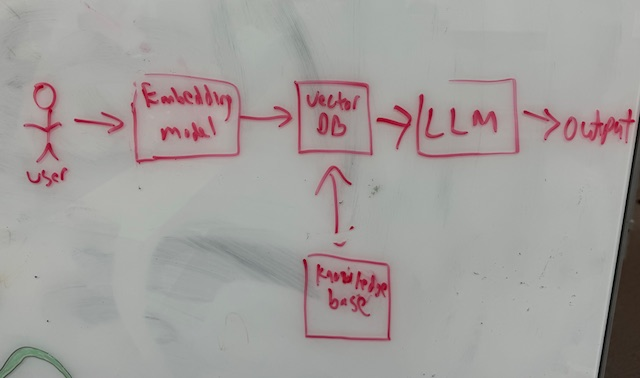

In [ ]:
import base64

with open(image_url, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

## Drawing --> Text
(lama3.2-90b-vision-instruct)

Get IDs and box coordinates -
Grounding DinoAHHHHH


In [ ]:
import os
import sys
import uuid
import zipfile
import time
import requests
# llama-3.2-11b-vision-instruct
# only vlm available now

nvai_url="https://ai.api.nvidia.com/v1/cv/nvidia/nv-grounding-dino"
nvai_polling_url = "https://api.nvcf.nvidia.com/v2/nvcf/pexec/status/"
header_auth = f"Bearer {nvidia_api_key}"

UPLOAD_ASSET_TIMEOUT = 300 # Timeout (in secs) to upload asset
MAX_RETRIES = 5 # Max num of retries while polling
DELAY_BTW_RETRIES = 1 # adding 1s delay between each polls

sys.argv = ['test.py', 'rectangle', '/content/sample_data/Image.png', '/content/sample_data']
# python test.py <prompt> <input_video> <output_dir>

def _upload_asset(input, description):
    assets_url = "https://api.nvcf.nvidia.com/v2/nvcf/assets"

    headers = {
        "Authorization": header_auth,
        "Content-Type": "application/json",
        "accept": "application/json",
    }

    s3_headers = {
        "x-amz-meta-nvcf-asset-description": description,
        "content-type": "video/mp4",
    }

    payload = {"contentType": "video/mp4", "description": description}

    response = requests.post(assets_url, headers=headers, json=payload, timeout=60)

    response.raise_for_status()

    asset_url = response.json()["uploadUrl"]
    asset_id = response.json()["assetId"]

    response = requests.put(
        asset_url,
        data=input,
        headers=s3_headers,
        timeout=UPLOAD_ASSET_TIMEOUT,
    )

    response.raise_for_status()
    return uuid.UUID(asset_id)


if __name__ == "__main__":
    """Uploads a video or image of your choosing to the NVCF API and sends a
    request to the Grounding Dino Object Detection model. The response is saved to a
    local directory.

    Note: You must set up an environment variable, NGC_PERSONAL_API_KEY.
    """
    print("sys.argv[0]:", sys.argv[0])
    print("sys.argv[1]:", sys.argv[1])
    print("sys.argv[2]:", sys.argv[2])
    print("sys.argv[3", sys.argv[3])
    if len(sys.argv) != 4:
        print("Usage: python test.py <prompt> <input_video> <output_dir>")
        sys.exit(1)

    asset_id = _upload_asset(open(sys.argv[2], "rb"), "Input Video")

    inputs = { "model": "Grounding-Dino",
        "messages": [
          {
            "role": "user",
            "content": [
                {
                  "type": "text",
                  "text": f"{sys.argv[1]}"
                },
                {
                "type": "media_url",
                "media_url": {
                  "url": f"data:image/jpeg;asset_id,{asset_id}"
                }
             }
            ]
          }
        ],
        "threshold": 0.3
      }

    asset_list = f"{asset_id}"

    headers = {
        "Content-Type": "application/json",
        "NVCF-INPUT-ASSET-REFERENCES": asset_list,
        "NVCF-FUNCTION-ASSET-IDS": asset_list,
        "Authorization": header_auth,
    }

    response = requests.post(nvai_url, headers=headers, json=inputs)
    print("response:", response)

    if response.status_code == 200: # evaluation complete, output video ready
        with open(f"{sys.argv[3]}.zip", "wb") as out:
            out.write(response.content)
        with zipfile.ZipFile(f"{sys.argv[3]}.zip", "r") as z:
            z.extractall(sys.argv[3])

    elif response.status_code == 202: # pending evaluation
        print("Pending evaluation ...")
        nvcf_reqid = response.headers['NVCF-REQID']
        nvai_polling_url = nvai_polling_url + nvcf_reqid

        # Polling to check if the response is ready
        while( MAX_RETRIES ):
            print(f'Polling ...')
            headers_polling = { "accept": "application/json", "Authorization": header_auth }
            response_polling = requests.get(nvai_polling_url, headers=headers_polling)
            if response_polling.status_code == 202: # evaluation pending
                print('Result is not yet ready.')
                MAX_RETRIES -= 1
                time.sleep(DELAY_BTW_RETRIES)
                continue
            elif response_polling.status_code == 200: # evaluation complete, output video ready
                print('Result ready!')
                with open(f"{sys.argv[3]}.zip", "wb") as out:
                    out.write(response_polling.content)
                break
            else:
                print(f"Unexpected response status: {response_polling.status_code}")

        with zipfile.ZipFile(f"{sys.argv[3]}.zip", "r") as z:
            z.extractall(sys.argv[3])

    print(f"Output saved to {sys.argv[3]}")
    print(os.listdir(sys.argv[3]))

sys.argv[0]: test.py
sys.argv[1]: rectangle
sys.argv[2]: /content/sample_data/Image.png
sys.argv[3 /content/sample_data
response: <Response [402]>
Output saved to /content/sample_data
['anscombe.json', 'README.md', 'Image.png', 'mnist_train_small.csv', 'california_housing_train.csv', 'california_housing_test.csv', 'mnist_test.csv']


Overlay ID numbers using Pillow


In [ ]:
!pip install pillow


In [ ]:
from PIL import Image, ImageDraw, ImageFont

def annotate_image_with_ids(image_path, box_data, output_path):
    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Define font for the text (adjust the font size based on image size)
    # font = ImageFont.truetype("arial.ttf", 20)

    # Loop through each box and draw the ID
    for box in box_data["boxes"]:
        x1, y1, x2, y2 = box["coordinates"]

        # Draw a rectangle around the detected box
        draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

        # Draw the ID number near the box
        draw.text((x1, y1 - 25), box["id"], fill="green", font_size=40)

    # Save the annotated image
    image.save(output_path)
    print(f"Annotated image saved as {output_path}")

# Example usage
box_data = {
    "boxes": [
        {"id": "1", "coordinates": [50, 80, 200, 150]},
        {"id": "2", "coordinates": [220, 180, 370, 250]}
    ]
}

annotate_image_with_ids("image.png", box_data, "image_labeled.png")
# annotate_image_with_ids(image_url, box_data, image_url)
# /content/sample_data/image.png
# image_url

Annotated image saved as image_labeled.png


Tree search


In [ ]:
!unset https_proxy

In [8]:
a_image_url = "/content/sample_data/3.jpeg"
# hand-labeled
import base64

with open(a_image_url, "rb") as image_file:
    encoded_annotated_image = base64.b64encode(image_file.read()).decode("utf-8")

In [9]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia import register_model, Model
import re
import json


def get_connected_boxes(box_id, box_info_list):

    register_model(Model(
            id="nvdev/meta/llama-3.2-90b-vision-instruct",
            model_type="vlm",
            client="ChatNVIDIA",
            endpoint="https://ai.api.nvidia.com/v1/gr/nvdev/meta/llama-3.2-90b-vision-instruct/chat/completions",
        )
    )
    vision_model = ChatNVIDIA(model="nvdev/meta/llama-3.2-90b-vision-instruct",
                              api_key=nvidia_api_key,
                              temperature=0,
                              top_p=0.7,
                              max_tokens=1024,)


    # return connected boxes based on your flowchart structure and store the information of the current node in json file
    extract_box_info_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert diagram understander. Please generate a dictionary that decribes the
        box with {box_id}, Give me only the dictionary and nothing else.

        TASK: Recognize the shape, color, text of the boxes, as well as what ID number it  points to.

        CONTEXT: This is a flowchart. boxes are all labeled with a number.
        INSTRUCTIONS:
        - Please use double quotation mark for strings.
        - When detecting what the boxes point to, know that one box can points to different boxes.
        If there is splits on arrows, that means it's pointing to multiple boxes.
        - The definition of 'box A points to box B', is there is an arrow starting from the box A to box B.
        - If a box points to nothing, ie, there is no arrow starting from it, then leave the list "points_to" empty.
        Please leave the 'points_to' list blank if a box is at the end of the flowchart.
        - ID number is the red number around the top-left corner of the boxes.

        Here is what I want you to do:
        1. record the shape, color, text of the boxes
        2.  If there is splits on arrows, that means it's pointing to multiple boxes.
            one box can points to multiple boxes, verify if the box is pointing to different ones,
            keep the list as the flowchart shows
        4. change the dictionary if there is a mistake

        """
        ),
        (
            "user",
            [
                {
                    "type": "image_url",
                    "image_url": {"url": "data:image/png;base64,{encoded_image}"},
                }
            ],
        ),
    ]
)
    box_info_chain = extract_box_info_prompt | vision_model
    box_info = box_info_chain.invoke({"box_id": box_id, "encoded_image": encoded_annotated_image})
    print("box_info", box_info.content, "enddddd")


    # Input text
    text = box_info.content

    # Regular expression to extract the dictionary
    pattern = r"\{[\s\S]*?\}"
    match = re.search(pattern, text)
    data_dict = {}
    if match:
        # Extracted dictionary as a string
        dict_string = match.group(0)
        print("dict_string", dict_string)
        # Convert the string to a Python dictionary
        data_dict = json.loads(dict_string)
        print("data_dict", data_dict)
        box_info_list.append(data_dict)
        # Save to a JSON file
        with open('output.json', 'w') as json_file:
            json.dump(data_dict, json_file, indent=4)

        print("Dictionary successfully extracted and saved as output.json!")
    else:
        print("No dictionary found in the input text.")


    #return the list of connection
    return data_dict["points_to"]

In [10]:
from collections import deque
visited = set()
queue = deque([1])
traversal_order = []
box_info_list = []
#bfs here
while queue:
    current_id = queue.popleft()
    if current_id not in visited:
        print("in here!!!")
        visited.add(current_id)
        traversal_order.append(current_id)
        connected_boxes = get_connected_boxes(current_id, box_info_list)
        #loop through the boxes that the current box points to
        for next_id in connected_boxes:
            if next_id not in visited:
                queue.append(next_id)

print("traversal_order", traversal_order)
print("box_info_list", box_info_list)
# how does it work when there are many boxes.limit.




in here!!!


/usr/local/lib/python3.10/dist-packages/langchain_nvidia_ai_endpoints/_statics.py:737: UserWarning: Model nvdev/meta/llama-3.2-90b-vision-instruct is already registered. Overriding id='nvdev/meta/llama-3.2-90b-vision-instruct' model_type='vlm' client='ChatNVIDIA' endpoint='https://ai.api.nvidia.com/v1/gr/nvdev/meta/llama-3.2-90b-vision-instruct/chat/completions' aliases=None supports_tools=False supports_structured_output=False base_model=None
  warnings.warn(


Exception: [400] Bad Request
Prompting with images is incompatible with system messages.

In [ ]:
!curl https://integrate.api.nvidia.com --head
# we can reach the server

HTTP/2 404 
server: awselb/2.0
date: Fri, 06 Dec 2024 18:53:27 GMT
content-type: text/plain; charset=utf-8
content-length: 0



In [ ]:
# could be image being too big
# after reduce image size, server is finally talking
# something in between colab and server have size limitation
# end of file error: inturrupted
# preprocess: shrink size of the image
# font size need to be readable
# black text


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia import register_model, Model
import re
import json


def get_connected_boxes(box_id, box_info_list):

    register_model(Model(
            id="nvdev/meta/llama-3.2-90b-vision-instruct",
            model_type="vlm",
            client="ChatNVIDIA",
            endpoint="https://ai.api.nvidia.com/v1/gr/nvdev/meta/llama-3.2-90b-vision-instruct/chat/completions",
        )
    )
    vision_model = ChatNVIDIA(model="nvdev/meta/llama-3.2-90b-vision-instruct",
                              api_key=nvidia_api_key,
                              temperature=0,
                              top_p=0.7,
                              max_tokens=1024,)
    # vision_model = ChatNVIDIA(
    #   model="nvdev/meta/llama-3.2-11b-vision-instruct",
    #    # ai.api.nvidia.com/v1/gr/meta/llama-3.2-90b-vision-instruct

    #   api_key=nvidia_api_key,
    #   temperature=0,
    #   top_p=0.7,
    #   max_tokens=1024,
    # )

    # return connected boxes based on your flowchart structure and store the information of the current node in json file
    extract_box_info_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert diagram understander. Please generate a dictionary that decribes the
        box with {box_id}, Give me only the dictionary and nothing else.

        Here is how the dictionary should look like: Recognize the shape, color, text of the boxes.
        In the dictionary there should also be a list that lists all the ID number of the boxes it points to.
        If a box points to nothing, then leave the list blank.

        Please use double quotation mark."""
        ),
        (
            "user",
            [
                {
                    "type": "image_url",
                    "image_url": {"url": "data:image/png;base64,{encoded_image}"},
                }
            ],
        ),
    ]
)
    box_info_chain = extract_box_info_prompt | vision_model
    box_info = box_info_chain.invoke({"box_id": box_id, "encoded_image": encoded_annotated_image})

    print("box_info", box_info.content, "enddddd")


    # Input text
    text = box_info.content

    # Regular expression to extract the dictionary
    pattern = r"\{[\s\S]*?\}"
    match = re.search(pattern, text)
    data_dict = {}
    if match:
        # Extracted dictionary as a string
        dict_string = match.group(0)
        print("dict_string", dict_string)
        # Convert the string to a Python dictionary
        data_dict = json.loads(dict_string)
        print("data_dict", data_dict)
        box_info_list.append(data_dict)
        # Save to a JSON file
        with open('output.json', 'w') as json_file:
            json.dump(data_dict, json_file, indent=4)

        print("Dictionary successfully extracted and saved as output.json!")
    else:
        print("No dictionary found in the input text.")


    #return the list of connection
    return data_dict["points_to"]

preprocess: crop out the diagram/only demo it on whiteboard


_________________________


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
diagram_text_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert diagram understander. Please generate a dictionary that decribes the
         the parts of the diagram drawn in architectural components. give me only the dictionary
         and nothing else. Please identify all the boxes and arrows in the diagram and store them in a
        dictionary. there could be multiple starting point in the diagram. multiple boxes can point
        to same box and same box and point to multiple boxes.
        Recognize the shape, color, text of the boxes. Also label them with ID number. for each of the item
        in the dictionary, there should also be a list in it. the list shoul list all the ID number of the boxes it
        points to. If a boz points to nothing, then leave the list blank."""
        ),
        (
            "user",
            [
                {
                    "type": "image_url",
                    "image_url": {"url": "data:image/png;base64,{encoded_image}"},
                }
            ],
        ),
    ]
)

In [ ]:
diagram_text = diagram_text_prompt | vision_model
enumerated_diagram = diagram_text.invoke({"encoded_image": encoded_image})

In [ ]:
enumerated_diagram.content

'The diagram consists of five boxes and four arrows. The boxes are labeled as follows:\n\n*   Box 1: "User"\n*   Box 2: "Embedding model"\n*   Box 3: "Vector DB"\n*   Box 4: "LLM"\n*   Box 5: "Knowledge base"\n\nThe arrows connect the boxes in the following manner:\n\n*   Arrow 1: From "User" to "Embedding model"\n*   Arrow 2: From "Embedding model" to "Vector DB"\n*   Arrow 3: From "Vector DB" to "LLM"\n*   Arrow 4: From "LLM" to "Knowledge base"\n\nBased on this information, we can create a dictionary that describes the parts of the diagram drawn in architectural components. The dictionary will have the following structure:\n\n```\n{\n    "Box 1": {\n        "label": "User",\n        "connections": []\n    },\n    "Box 2": {\n        "label": "Embedding model",\n        "connections": ["Box 3"]\n    },\n    "Box 3": {\n        "label": "Vector DB",\n        "connections": ["Box 4"]\n    },\n    "Box 4": {\n        "label": "LLM",\n        "connections": ["Box 5"]\n    },\n    "Box 5"

In [ ]:
diagram_dictionary = enumerated_diagram.content

In [ ]:
code_model = ChatNVIDIA(
  model="abacusai/dracarys-llama-3.1-70b-instruct",
  api_key=nvidia_api_key,
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)


In [ ]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert diagram generator. Please create a valid Mermaid diagram for a dictionary that describes the diagram summary.

        Ensure that:
        the output mermaid code should accurately describe the color and shape of the boxes according to the dictionary.
        the "fill" color of the boxes should be white since we are drawing on whiteboard
        Change the shape of a node using style like this:

        use double parenthesis (()) for circle, example:
        flowchart LR
          id1((This is the text in the circle))

        change the color of the frame and the text using style, here is an example of a diagram with boxes with
        different shapes and colors

        graph TD
          A[Start] --> B[Process]
          B --> C((End))

          style A fill:#f9f,stroke:#ff0000,stroke-width:4px;  %% Red border
          style B fill:#ccf,stroke:#00ff00,stroke-width:2px;  %% Green border
          style C fill:#cfc,stroke:#0000ff,stroke-width:3px;  %% Blue border



        The output is syntactically correct Mermaid code that can be rendered without errors.
        No additional text or explanation is included outside of the code block.
        The code block starts with graph LR as the start of the output
        Do not include markdown rendering or newline characters. Please be sure it's valid mermaid.
        Only put in an image if the component in the architecture diagram starts with "COMPONENT:"
        Otherwise, just use the label after "STEP:" and don't insert an image. The label should just be the string listed after "STEP:"
        An example of what proper image linking looks like is component[<img src='https://raw.githubusercontent.com/haydeniw/nv-icons/refs/heads/main/img.svg'].

        Here is valid output example:

        graph LR
            Query -->
            LLM[<img src='https://raw.githubusercontent.com/haydeniw/nv-icons/refs/heads/main/NIM.svg'>] -->
            Output

        Only generate syntactically correct mermaid code based off """),
        ("user", """Here is the dictionary {diagram_dictionary}."""),
    ]
)

In [ ]:
chain = prompt | code_model
response = chain.invoke({"diagram_dictionary": diagram_dictionary})
code = response.content
code = code.replace("mermaid", "")
print(code)

graph LR
    User --> Embedding model
    Embedding model --> Vector DB
    Vector DB --> LLM
    LLM --> Knowledge base

    style User fill:#f9f,stroke:#ff0000,stroke-width:4px;
    style Embedding model fill:#ccf,stroke:#00ff00,stroke-width:2px;
    style Vector DB fill:#cfc,stroke:#0000ff,stroke-width:3px;
    style LLM fill:#f9f,stroke:#ff0000,stroke-width:4px;
    style Knowledge base fill:#ccf,stroke:#00ff00,stroke-width:2px;


### Pull out architectural components from text

In [ ]:
import re
pattern = r'(?<=COMPONENT:\s)([A-Za-z ]+)'
matches = re.findall(pattern, enumerated_diagram.content)
final_matches = ', '.join(matches)
final_matches

## Pick icons
Select icons from textual representation of architecture diagram using structured output.

Create a type that captures the icons

In [ ]:
from typing import List
from enum import Enum

# override default enum
class MyEnum(Enum):
    def __repr__(self):
        return self.name
    def __str__(self):
        return self.__repr__()

def list_icons(directory: str) -> MyEnum:
    file_list = os.listdir(directory)
    icon_names = MyEnum('IconName', file_list)
    return icon_names

In [ ]:
icon_names = list_icons('./icons')
names = [svg.name for svg in icon_names]
names

Use structured output and prompting to get icons for each identifable component

In [ ]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from typing import Dict


#TODO: remove class because it makes ryan mad
class IconSelection(BaseModel):
    icon_list: Dict[str, str] = Field(description="Appropriate icons to pick for the diagram component") #used to be icon_names

model = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=nvidia_api_key,
  temperature=0,
  top_p=0.7,
  max_tokens=1024,
)

icon_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """Given an explanation of parts in a diagram,
        produce a dictionary where the key is the component name and the value is the name
        of an icon that is the closest match to the component name given the possible options.
        An LLM or embedding model is always a NIM.
        A knowledge base is always just generic data"""
        ),
        ("user", """Here are the individual components in the architecture diagram: {architecture_diagram}. Here are the
        icon names to pick from: {icons}."""
        ),
    ]
)

structured_llm = model.with_structured_output(IconSelection)
icon_chain = icon_prompt | structured_llm

In [ ]:
list_of_icons = icon_chain.invoke({"architecture_diagram":final_matches, "icons": names}).icon_list

In [ ]:
list_of_icons

Regex for code generation

In [ ]:
def replace_component(match):
    component = match.group(0).strip()
    return str(list_of_icons.get(component, component))

In [ ]:
import re
replace_pattern = r'(?<=COMPONENT:\s)([A-Za-z ]+)'
result = re.sub(replace_pattern, replace_component, enumerated_diagram.content)

In [ ]:
result

## Generate Mermaid code
using `abacusai / dracarys-llama-3.1-70b-instruct` -- Fine-tuned Llama 3.1 70B model for code generation, summarization, and multi-language tasks.

In [ ]:
code_model = ChatNVIDIA(
  model="abacusai/dracarys-llama-3.1-70b-instruct",
  api_key=nvidia_api_key,
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert diagram generator. Please create a valid Mermaid diagram for a flowchart that describes the diagram summary.

        Ensure that:
        The output is syntactically correct Mermaid code that can be rendered without errors.
        No additional text or explanation is included outside of the code block.
        The code block starts with graph LR as the start of the output
        Do not include markdown rendering or newline characters. Please be sure it's valid mermaid.
        Only put in an image if the component in the architecture diagram starts with "COMPONENT:"
        Otherwise, just use the label after "STEP:" and don't insert an image. The label should just be the string listed after "STEP:"
        An example of what proper image linking looks like is component[<img src='https://raw.githubusercontent.com/haydeniw/nv-icons/refs/heads/main/img.svg'].

        Here is valid output example:

        graph LR
            Query -->
            LLM[<img src='https://raw.githubusercontent.com/haydeniw/nv-icons/refs/heads/main/NIM.svg'>] -->
            Output

        Only generate syntactically correct mermaid code based off """),
        ("user", """Here is the architecture diagram {architecture_diagram}."""),
    ]
)

In [ ]:
chain = prompt | code_model
response = chain.invoke({"architecture_diagram": result})
code = response.content
code = code.replace("mermaid", "")

In [ ]:
code

## Render mermaid code

In [ ]:
graphbytes = code.encode("utf8")
base64_bytes = base64.urlsafe_b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
url="https://mermaid.ink/img/" + base64_string
print(url)

In [ ]:
from IPython.display import IFrame

# Display the iframe in the notebook
IFrame(url, width="100%", height=400)

In [ ]:
#use cv to generate cooridinates(not working)

In [ ]:
import cv2
# import pytesseract
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load image using OpenCV
image = cv2.imread(image_url)

# Convert to grayscale for better processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("gray")
cv2_imshow(gray)

_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Use OpenCV to detect contours (rectangles)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, thickness 2
print("contour")
cv2_imshow(contour_image)

# Filter and collect rectangular bounding boxes
rectangles = []
for contour in contours:
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:  # Check if the contour is rectangular
        x, y, w, h = cv2.boundingRect(approx)
        rectangles.append((x, y, x + w, y + h))  # (left, top, right, bottom)

# Visualize detected rectangles
for rect in rectangles:
    cv2.rectangle(image, (rect[0], rect[1]), (rect[2], rect[3]), (0, 255, 0), 2)

print(rectangles)
print('Detected Rectangles')
cv2_imshow(image)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_nvidia_ai_endpoints import ChatNVIDIA

vision_model = ChatNVIDIA(
  model="meta/llama-3.2-90b-vision-instruct",
  api_key=nvidia_api_key,
  temperature=0,
  top_p=0.7,
  max_tokens=1024,
)